# Kannada MNIST Handwritten Digits

Centers around the [Kannada MNIST Competition](https://www.kaggle.com/c/Kannada-MNIST/overview) in Kaggle.

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

## 1. Loading and Exploring the data.

In [2]:
train_df = pd.read_csv('./datasets/Kannada_MNIST/Kannada-MNIST/train.csv')
test_df = pd.read_csv('./datasets/Kannada_MNIST/Kannada-MNIST/test.csv')

In [3]:
train_df.shape

(60000, 785)

In [4]:
test_df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


*Notes*: It seems 785 columns - 1 for the label and the remaining 784 marked as 0 to 783 pixes, which would result in a 28x28 image size. Considering the information provided on the competition's Kaggle page the images are going to have only 1 channel. Looking at the df description it seems that it is already rescaled from 0 to 255.

In [7]:
def display_img(img_row, img_height=28, img_width=28):
    '''
        A helper function to display an image from 
        one of the rows.
        Default height and width are 28.
    '''
    img_np = img_row.reshape((img_height, img_width))
    img = plt.imshow(img_np, cmap='gray')

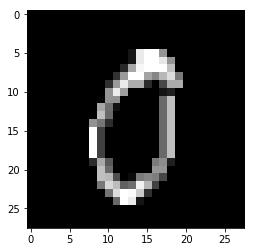

In [8]:
# displaying the first image
display_img(train_df.iloc[0,1:].values)

## 2. The Train-Test Split

Train-Test split has been chosen (arbitrarily) to be 20%.

In [11]:
X, y = train_df.iloc[:, 1:], train_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Models

In [72]:
# Copying a function that creates a submission to be uploaded to Kaggle
def make_submission(y_hat, filename):
    indices = [i for i in range(1, y_hat.shape[0] + 1)]
    predictions_df = pd.DataFrame({'id':indices, 'label': y_hat})
    file_path = './submissions/'
    predictions_df.to_csv(file_path + filename, index=False)
    print('Done!')

### 3.1 The Shallows

In [74]:
# utils
from sklearn.model_selection import KFold, cross_val_score
# RF
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### 3.1.1 RF
Training an Random Forest to set a baseline for the CNNs used later.

In [81]:
rf = RandomForestClassifier(n_estimators = 500, max_features='sqrt', min_samples_leaf = 5, random_state = 42, n_jobs=-1)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_scores.mean()

0.9722916761298525

In [89]:
y_hat = rf.predict(X_test)
print('Test Score: ', sum(y_hat == y_test)/y_test.shape[0])

Test Score:  0.976


In [92]:
X_subm = test_df.iloc[:, 1:].values
y_subm = rf.predict(X_subm)

In [93]:
make_submission(y_subm, 'Kannada_MNIST_20191005_submission_1.csv')

Done!


#### 3.1.2 SVM

In [97]:
svc = SVC(kernel='rbf', C=20) # random guessing of params
svc_scores = cross_val_score(svc, X_train, y_train, cv=5, n_jobs=-1)
svc_scores.mean()

0.10064583298283421

#### 3.2 The Deep Ones

In [9]:
# Importing the libraries
import keras
from keras.models import Model
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D, Input, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.optimizers import Adam, RMSprop
from keras.metrics import categorical_accuracy
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras_tqdm import TQDMNotebookCallback
from keras.layers.merge import concatenate
from keras.utils import plot_model
from keras.callbacks import Callback, LearningRateScheduler

Using TensorFlow backend.


#### 3.2.0 Pre-processing the data

##### 3.2.0.1 One-hot encoding the label vectors

In [12]:
y_1h_train = to_categorical(y_train, num_classes = 10)
y_1h_test = to_categorical(y_test, num_classes = 10)

##### 3.2.0.2 Reshaping the Training and Test Sets

In [13]:
X_r_train = X_train.values.reshape(-1, 28, 28, 1)
X_r_test = X_test.values.reshape(-1, 28, 28, 1)

##### 3.2.0.3 Creating the validation set

In [14]:
X_dl_train, X_dl_validation, y_dl_train, y_dl_validation = train_test_split(X_r_train, y_1h_train, test_size=0.1, random_state=42)

##### 3.2.0.4 Creating the Datagen

In [15]:
# shuffle the data so the model generalizes better
datagen = ImageDataGenerator(
        rotation_range=15, # only slight rotation is expected
        zoom_range = 0.1) 

In [16]:
datagen.fit(X_dl_train)

##### 3.2.0.5 Helper function to save model.

In [16]:
def save_model(model):
    # serialize model to JSON
    model_json = model.to_json()
    with open('models/kmnist_model.json', 'w') as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights('models/kmnist_model.h5')
    print("Saved model to disk")

##### 3.2.0.6 Keras Callbacks

In [18]:
import math

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 2.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
loss_history = LossHistory()

In [19]:
# define the callbacks list
callbacks = [loss_history, lrate, TQDMNotebookCallback()]
callbacks_wo_ls = [loss_history, TQDMNotebookCallback()]

### 3.2 The Deep Ones

#### 3.2.1 From Scratch CNN
Not very original - copying VGG19's architecture

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [24]:
history = model.fit_generator(datagen.flow(X_dl_train,y_dl_train, batch_size=64),
                              epochs = 5, validation_data = (X_dl_validation, y_dl_validation),
                              verbose = 2, steps_per_epoch=X_dl_train.shape[0] // 64,
                              callbacks=callbacks_wo_ls)

Epoch 1/5


 - 9s - loss: 0.0527 - acc: 0.9858 - val_loss: 0.0292 - val_acc: 0.9927
Epoch 2/5


 - 9s - loss: 0.0418 - acc: 0.9874 - val_loss: 0.0245 - val_acc: 0.9933
Epoch 3/5


 - 9s - loss: 0.0373 - acc: 0.9887 - val_loss: 0.0211 - val_acc: 0.9944
Epoch 4/5


 - 9s - loss: 0.0320 - acc: 0.9909 - val_loss: 0.0200 - val_acc: 0.9948
Epoch 5/5


 - 9s - loss: 0.0283 - acc: 0.9919 - val_loss: 0.0227 - val_acc: 0.9952



In [66]:
final_loss, final_accuracy = model.evaluate(X_r_test, y_1h_test, verbose=0)
print(f'Final loss: {final_loss}, final accuracy: {final_accuracy}')

Final loss: 0.021542856123448778, final accuracy: 0.9948333333333333


WHOA! Lets save it.

In [31]:
save_model(model)

Saved model to disk


#### 3.2.2 Inception-Net From Scratch

In [19]:
# function for creating a naive inception block
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out
 
# define model input
visible = Input(shape=(28, 28, 1))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# flatten the output
flatten = Flatten()(layer)
# add a FC layer
dense = Dense(192, activation='relu')(flatten)
dense = Dense(192, activation='relu')(dense)
# finally the softmax
output = Dense(10, activation='softmax')(dense)

model = Model(inputs=visible, outputs=output)
# summarize model
model.summary()





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 96)   192         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 16)   32          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [22]:
history = model.fit_generator(datagen.flow(X_dl_train,y_dl_train, batch_size=64),
                              epochs = 20, validation_data = (X_dl_validation, y_dl_validation),
                              verbose = 2, steps_per_epoch=X_dl_train.shape[0] // 64,
                              callbacks=callbacks_wo_ls)

Epoch 1/20


 - 104s - loss: 6.7384 - acc: 0.5817 - val_loss: 6.5538 - val_acc: 0.5933
Epoch 2/20


 - 104s - loss: 6.7274 - acc: 0.5825 - val_loss: 6.5354 - val_acc: 0.5944
Epoch 3/20


 - 104s - loss: 6.7172 - acc: 0.5831 - val_loss: 6.5433 - val_acc: 0.5940
Epoch 4/20


 - 104s - loss: 6.7360 - acc: 0.5820 - val_loss: 6.6637 - val_acc: 0.5865
Epoch 5/20


 - 104s - loss: 6.8477 - acc: 0.5750 - val_loss: 6.5581 - val_acc: 0.5931
Epoch 6/20


 - 104s - loss: 6.7866 - acc: 0.5788 - val_loss: 6.6318 - val_acc: 0.5881
Epoch 7/20


 - 104s - loss: 6.8112 - acc: 0.5773 - val_loss: 6.6084 - val_acc: 0.5900
Epoch 8/20


 - 104s - loss: 6.6970 - acc: 0.5844 - val_loss: 6.5178 - val_acc: 0.5956
Epoch 9/20


 - 104s - loss: 6.7080 - acc: 0.5838 - val_loss: 6.5010 - val_acc: 0.5967
Epoch 10/20


 - 104s - loss: 6.8875 - acc: 0.5725 - val_loss: 6.5807 - val_acc: 0.5917
Epoch 11/20


 - 104s - loss: 6.8542 - acc: 0.5747 - val_loss: 6.6689 - val_acc: 0.5863
Epoch 12/20


 - 104s - loss: 6.8129 - acc: 0.5772 - val_loss: 6.7107 - val_acc: 0.5835
Epoch 13/20


 - 104s - loss: 6.8093 - acc: 0.5775 - val_loss: 6.5312 - val_acc: 0.5948
Epoch 14/20


 - 104s - loss: 6.7166 - acc: 0.5832 - val_loss: 6.6017 - val_acc: 0.5904
Epoch 15/20


 - 104s - loss: 6.6940 - acc: 0.5846 - val_loss: 6.4875 - val_acc: 0.5975
Epoch 16/20


 - 104s - loss: 6.6618 - acc: 0.5866 - val_loss: 6.4942 - val_acc: 0.5971
Epoch 17/20


 - 104s - loss: 6.7286 - acc: 0.5824 - val_loss: 6.4963 - val_acc: 0.5969
Epoch 18/20


 - 104s - loss: 6.8044 - acc: 0.5777 - val_loss: 6.5278 - val_acc: 0.5950
Epoch 19/20


 - 105s - loss: 6.7102 - acc: 0.5836 - val_loss: 6.5010 - val_acc: 0.5967
Epoch 20/20


 - 104s - loss: 6.7633 - acc: 0.5803 - val_loss: 6.6689 - val_acc: 0.5863

